In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import scipy as sp
import math
import random
from scipy.optimize import curve_fit,minimize
from numpy.linalg import inv
from tqdm import tqdm as tqdm

# Simple Deadtime Model: 

True Rate (n): $$n=n_0 e^{-\lambda t} $$

Mearured Rate (m): $$m= {\frac  {n}{1+nD}}$$

In [18]:

m = lambda lam, D, n_0, t: (n_0*np.exp(-lam*t))/(1+n_0*np.exp(-lam*t)*D)

t_half = 17 # (s)
lam = np.log(2)/t_half # (Hz)
n_0 = 500*10**3 # (Hz)
D = 50*10**-6 # (s)

t = np.arange(0,t_half*20,1) #(s)

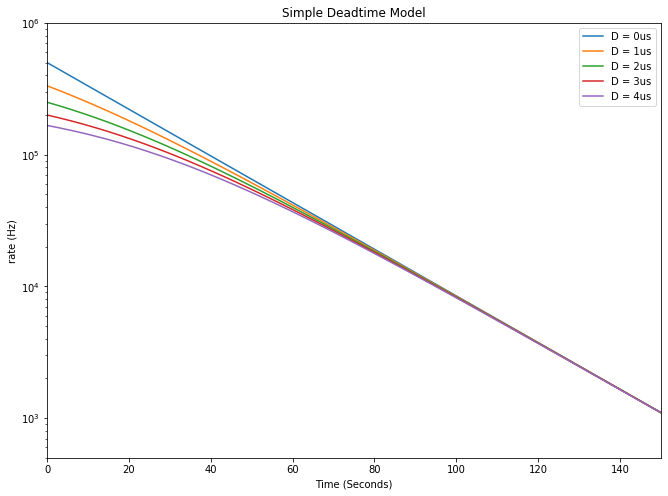

In [19]:
plt.figure(figsize=(11,8))
plt.title('Simple Deadtime Model')
plt.ylabel('rate (Hz)')
plt.xlabel('Time (Seconds)')
plt.xlim(0,150)
plt.ylim(5*10**2,10**6)
for i in range(0,5,1):
    D = i*10**-6  
    plt.plot(t,m(lam,D,n_0,t), label= 'D = {}us'.format(i))
plt.legend()
plt.yscale('log')
plt.savefig('SimpleDeadtimeModel')

In [32]:
# Is it actually 2 us?
# n = 55 kHz
# m = 50 kHz

def dfit(m,D):
    return (m/(1-m*D))

dfit(50*10**3, 1.8182*10**-6)

# Yes, more like D = 1.82 us
# They were getting more like D = 18 us.  

55000.055000055